
## Project: Investigate a Dataset (TMDb Movie Data)

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> The main goal of this project is to explore the available data set and do the necessary wrangling and a reasonable conclusion.
>  Below are some of the questions to be looked at;
* Does runtime affects the revenue?
* what kinds of properties are associated with movies that have high revenues(Top 20)
* Release year and revenue, is there a relationship between them.
* what year has the greatest revenue 

In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I would be checking for cleanliness, and then trim and clean the dataset for analysis.<br> 
> These process would include;
* Incorrect data types check
* Missing data check
* Removing duplicates from rows
* Renaming column names where necessarry



### Data Cleaning (General Properties)

In [4]:
#Importing the dataset

df = pd.read_csv("tmdb-movies.csv")

In [5]:
#Checking to know the available column names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#Investigating to know the information(non-null and dtype) of each column of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Fixing Datatypes:  Changing Release Date datatype from object to date.

In [7]:
def create_date_col(df, col):
    """
    This function helps to create a datetime column from an object 
    and returns datetime datatype
    """
    return pd.to_datetime(df[col])
    

In [8]:
# convert release date to datetime using the column created above
df['release_date'] = create_date_col(df, 'release_date')

In [9]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

Number of null values in each column

In [10]:
df.isnull().sum().sort_values(ascending= False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
budget_adj                 0
release_year               0
vote_average               0
vote_count                 0
release_date               0
id                         0
runtime                    0
original_title             0
revenue                    0
budget                     0
popularity                 0
revenue_adj                0
dtype: int64

Filling null values with **no information** because forward fill, backward fill, mode and median fill is not reasonable for this type of data.

In [11]:
df.fillna(value = "no information", inplace= True)
#confirming that there are no null values in the dataframe.
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [12]:
#Checking for duplicates in the dataframe
df.duplicated().sum()

1

In [13]:
#checking through the duplicated rows for confirmation before dropping.
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,no information,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,no information,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [14]:
#Dropping the duplicates after confirmation
df.drop_duplicates(inplace=True)

#checking to see if there are more duplicates after dropping
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 ( How does the runtime affects the revenue?)

In [15]:
# define a function for all your plots
def axis_title_plot(x_label, y_label, title):

    """generate x label, y label and title for a plot
    it takes in the x_label, y_label, title
    and print out its attributes on a plot
    """
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


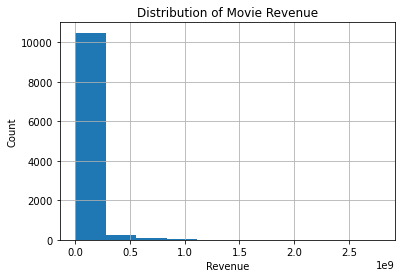

In [16]:
# plot the distribution of revenue to understand how they align
df['revenue'].hist()
axis_title_plot(x_label='Revenue', y_label='Count', title='Distribution of Movie Revenue')

**Summary of Findings:** The distribution of the revenue from the graph is right-skewed, where must of the values(`Revenue`) are less than $100M. Meaning that only few movie can get a Revenue greater than `$100M`

In [17]:
df['revenue'].mean()

39826896.07685228

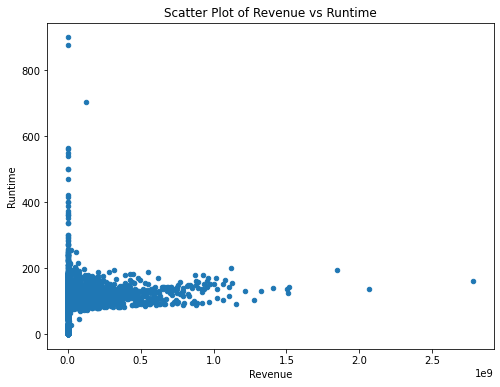

In [18]:
# Check the relationship between revenue and runtime using scatter plot
df.plot.scatter(x = 'revenue', y = 'runtime', figsize=(8,6))
axis_title_plot(x_label='Revenue', y_label='Runtime', title='Scatter Plot of Revenue vs Runtime')

**Summary of Findings:** From the diagram above, it can be deduced that increase in `runtime` does affect the an increase in revenue. However we can see that majority of the Runtime id between the minute of `100` - `200` . We can also see big money Movies at runtime less than `200` Minutes.

### Research Question 2  (Finding the relationship between the release year and revenue)

In [19]:
#Looking at the top 10 revenues and their year of release using groupby Value
df.groupby(['release_year']).mean()['revenue'].sort_values(ascending=False).head(10)

release_year
1997    5.549569e+07
2001    5.541357e+07
2002    5.505120e+07
2004    5.470301e+07
2003    5.387275e+07
1995    5.232195e+07
1999    5.069515e+07
2000    4.836432e+07
1992    4.570040e+07
2005    4.537592e+07
Name: revenue, dtype: float64

**Summary of Findings:** Looking at the data above, late 90's and early 2000's have the highest revenue with 1997 leading the race.

### Research Question 3  (What kinds of properties are associated with movies that have high revenue?)

In [20]:
#I am trying to get all the rows associated with the 20 highest revenues
df_high = df.sort_values(by=['revenue'], ascending= False).head(20)

In [21]:
df_high.mean()

id              5.712840e+04
popularity      7.184929e+00
budget          1.883500e+08
revenue         1.366390e+09
runtime         1.382500e+02
vote_count      4.515250e+03
vote_average    6.990000e+00
release_year    2.010000e+03
budget_adj      1.868408e+08
revenue_adj     1.387102e+09
dtype: float64

**Summary of Findings:** Looking at the characteristics of the top 20 variables, we can deduce that the top revenues have an average runtime of 138 minutes and budget of 188million dollars.

### Research Question 4  (What year has the greatest revenue?)

In [22]:
# get movie with highest average revenue
df.groupby(['release_year']).mean()['revenue'].sort_values(ascending=False).head(1)

release_year
1997    5.549569e+07
Name: revenue, dtype: float64

**Summary of Findings:** The year 1997 had the highest average revenue compared to other years. From the data, there had been big boom in movie sales for the Movie industry during this period.

<a id='conclusions'></a>
## Conclusions

**Limitation** <br/>
* I filled in missing values with 'no information', there could have been a better way to fill this.
* Most of my conclusions were estimated values because the values in the data set are too big.


### Summary From Question
* **How does the runtime affects the revenue?**
 - The distribution of the revenue from the graph is right-skewed, where must of the values(`Revenue`) are less than $100M. Meaning that only few movie can get a Revenue greater than `$100M`
* **Finding the relationship between the release year and revenue.**
 - From the plotted  , it can be deduced that increase in `runtime` does affect the an increase in revenue. However we can see that majority of the Runtime id between the minute of `100` - `200` . We can also see big money Movies at runtime less than `200` Minutes. And also, Looking at the data above, late 90's and early 2000's have the highest revenue with 1997 leading the race.
* **What kinds of properties are associated with movies that have high revenue?**
 - Looking at the characteristics of the top 20 variables, we can deduce that the top revenues have an average runtime of `138 minutes` and Revenue of `188 million dollars`.
* **What year has the greatest revenue?**
- The year 1997 had the highest average revenue compared to other years. From the data, there had been big boom in movie sales for the Movie industry during this period

### Final Conclusion:
> Looking at the exploration done in this dataset, one would find out that there were high revenues back in the early 90's and late 20's years compared to recent times, which means people watch movies more in the past than now that brought about more returns for the industry. 